In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Cleaning

In [4]:
# # Load batches of data to test code
# # For most accurate results use all data
# chunk_size = 100000
# csv_chunks = pd.read_csv('US_Accidents_March23.csv', chunksize=chunk_size)

# # Load in batches of data one by one
# all_chunks = [] 
# for i, chunk in enumerate(csv_chunks):
#     # Only keep necessary columns, we focus on weather
#     cols_to_keep = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 
#                     'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 
#                     'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']
#     df = chunk[cols_to_keep]
    
#     # fill na with 0 so we don't lose info or unintentionally condition our data on bad weather
#     df = df.fillna(0)
#     all_chunks.append(df)

#     # limit number of chunks
#     if i == 5:
#         break
# # Combine chunks into one dataframe
# df = pd.concat(all_chunks)

In [5]:
#df = pd.read_csv('cleaned_US_Accidents.csv/cleaned_US_Accidents.csv', index_col=0)
# Load all data for most accurate results
df = pd.read_csv('cleaned_US_Accidents.csv', index_col=0)

# Only keep necessary columns, we focus on weather
cols_to_keep = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 
                'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 
                'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']
df = df[cols_to_keep]

# fill na with 0 so we don't lose info or unintentionally condition our data on bad weather
df = df.fillna(0)
data = pd.get_dummies(df, drop_first=True, dtype=np.int64)

# Separate the dependant and independant variable
# We predict the severity based on the weather
X = data.drop(columns=['Severity'])
y = data['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Random Forest

In [6]:
# Initialize and fit the forest
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)

print(f'Oob Score: {rf.oob_score_}')

# Extract the feature importances of the forest
feature_importances = rf.feature_importances_
feature_names = X.columns
features = sorted(zip(feature_importances, feature_names))
print(f'Best Features {features[-3:]}')
print(f'Worst Features {features[:3]}')

Oob Score: 0.7436458992163489
Best Features [(np.float64(0.16232103899086248), 'Temperature(F)'), (np.float64(0.21840773817930284), 'Humidity(%)'), (np.float64(0.2742312403492915), 'Pressure(in)')]
Worst Features [(np.float64(0.0008157572485018176), 'Wind_Direction_Variable'), (np.float64(0.001457136049072745), 'Wind_Direction_East'), (np.float64(0.0015605988218312416), 'Wind_Direction_VAR')]


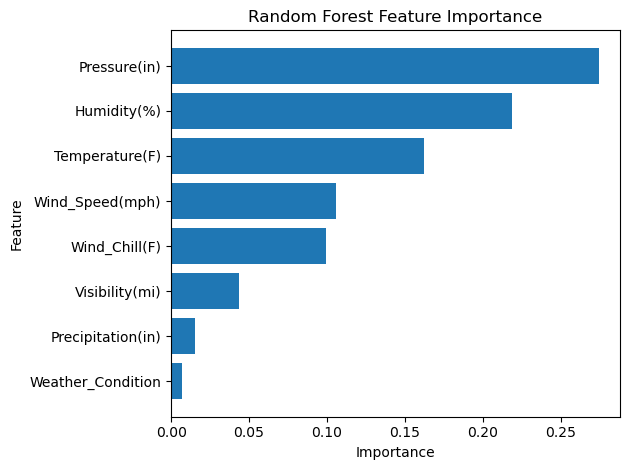

In [7]:
# Only plot the most important features to avoid overcrowding
importances = rf.feature_importances_
k = len(importances) // 4
indices = np.argsort(importances)[-k:]

# Plot and label importances
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('figures/rf_feature_importance')

In [9]:
#Only run on batched data

# # Decide what values of max_depth and max_features to search over
# max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# max_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# best_oob_score = 0
# best_params = None

# # Perform a grid search
# for max_depth in max_depths:
#   for mf in max_features:
#     # Initialize and fit the forest
#     rf = RandomForestClassifier(oob_score=True, max_depth=max_depth, max_features=mf)
#     rf.fit(X_train, y_train)
      
#     # find best oob score and save parameters
#     if best_oob_score < rf.oob_score_:
#       best_oob_score = rf.oob_score_
#       best_params = max_depth, mf

# print(f'Best Oob Score: {best_oob_score}')
# print(f'Best Parameters: {best_params}')

# Boosting

In [10]:
# Initialize and fit the forest
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Identify and print accuracy
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7628015551608767


In [12]:
# Extract the feature importances of the forest
feature_importances = gb.feature_importances_
feature_names = X.columns

# Print best and worst features
features = sorted(zip(feature_importances, feature_names))
print(f'Best Features: {features[-3:]}')
print(f'Worst Features: {features[:3]}')

Best Features: [(np.float64(0.04946275257288716), 'Wind_Speed(mph)'), (np.float64(0.286260942698579), 'Pressure(in)'), (np.float64(0.5166464974323629), 'Wind_Chill(F)')]
Worst Features: [(np.float64(0.0), 'Wind_Direction_ENE'), (np.float64(3.1607864413004635e-06), 'Wind_Direction_ESE'), (np.float64(2.4272454356369406e-05), 'Wind_Direction_NW')]


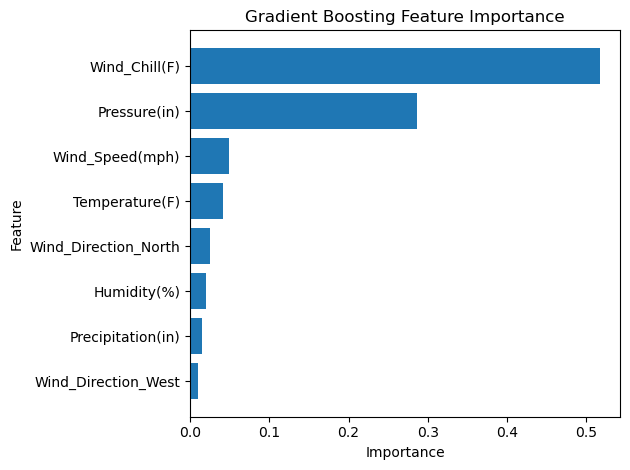

In [13]:
# Only plot the highests importances to avoid overcrowding
importances = gb.feature_importances_
k = len(importances) // 4
indices = np.argsort(importances)[-k:]

# Plot and label XG-boost importances
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("figures/boosting_feature_importance")